<a href="https://colab.research.google.com/github/drfperez/lightkurve/blob/main/Rebound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

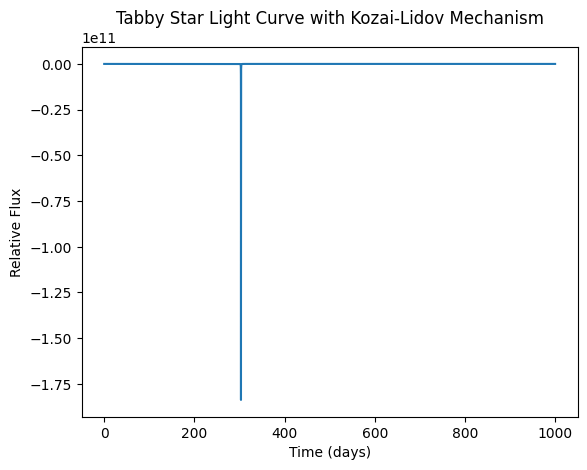

In [3]:

import numpy as np
import rebound
import matplotlib.pyplot as plt

# Set up the N-body simulation
def tabby_star_simulation(t_end, dt, G, m_star, m_planet, a, e, omega, Omega, i, R_star, T_star, m_third_body):
    # Initialize the rebound simulation
    sim = rebound.Simulation()
    sim.G = G

    # Add the star
    sim.add(m=m_star, r=R_star)

    # Add the planet
    sim.add(m=m_planet, a=a, e=e, omega=omega, Omega=Omega, inc=i)

    # Add the third body (e.g., a distant star or planet)
    sim.add(m=m_third_body, a=10, e=0.5, omega=45, Omega=45, inc=45)

    # Set up the time array
    t = np.arange(0, t_end, dt)

    # Initialize the light curve array
    light_curve = np.zeros(len(t))

    # Simulate the N-body system
    for i, ti in enumerate(t):
        sim.integrate(ti)
        # Calculate the distance between the star and planet
        r = np.linalg.norm(sim.particles[1].x - sim.particles[0].x)
        # Calculate the flux (more complex model)
        flux = (1 - (R_star / r)**2) * (1 - (m_planet / m_star)**(2/3)) * (T_star / (T_star + 500))**4
        light_curve[i] = flux

    return t, light_curve

# Set up the simulation parameters
t_end = 1000  # days
dt = 0.1  # days
G = 6.67430e-11  # m^3 kg^-1 s^-2
m_star = 1.4  # solar masses
m_planet = 0.01  # Jupiter masses
a = 0.05  # AU
e = 0.5  # eccentricity
omega = 30  # degrees
Omega = 45  # degrees
i = 60  # degrees
R_star = 1.4  # solar radii
T_star = 6500  # Kelvin
m_third_body = 0.1  # solar masses (mass of the third body)

# Run the simulation
t, light_curve = tabby_star_simulation(t_end, dt, G, m_star, m_planet, a, e, omega, Omega, i, R_star, T_star, m_third_body)

# Plot the light curve
plt.plot(t, light_curve)
plt.xlabel('Time (days)')
plt.ylabel('Relative Flux')
plt.title('Tabby Star Light Curve with Kozai-Lidov Mechanism')
plt.show()

In [4]:

import numpy as np
import rebound
import matplotlib.pyplot as plt

# Set up the N-body simulation
def tabby_star_simulation(t_end, dt, G, m_star, m_planet, a, e, omega, Omega, i, R_star, T_star, m_third_body, num_planetesimals):
    # Initialize the rebound simulation
    sim = rebound.Simulation()
    sim.G = G

    # Add the star
    sim.add(m=m_star, r=R_star)

    # Add the planet
    sim.add(m=m_planet, a=a, e=e, omega=omega, Omega=Omega, inc=i)

    # Add the third body (e.g., a distant star or planet)
    sim.add(m=m_third_body, a=10, e=0.5, omega=45, Omega=45, inc=45)

    # Add a large number of planetesimals with different sizes
    for i in range(num_planetesimals):
        m_planetesimal = np.random.uniform(0.01, 0.1)  # random mass between 0.01 and 0.1 solar masses
        a_planetesimal = np.random.uniform(0.1, 1)  # random semi-major axis between 0.1 and 1 AU
        e_planetesimal = np.random.uniform(0, 0.5)  # random eccentricity between 0 and 0.5
        omega_planetesimal = np.random.uniform(0, 360)  # random argument of periapsis between 0 and 360 degrees
        Omega_planetesimal = np.random.uniform(0, 360)  # random longitude of the ascending node between 0 and 360 degrees
        i_planetesimal = np.random.uniform(0, 180)  # random inclination between 0 and 180 degrees
        sim.add(m=m_planetesimal, a=a_planetesimal, e=e_planetesimal, omega=omega_planetesimal, Omega=Omega_planetesimal, inc=i_planetesimal)

    # Set up the time array
    t = np.arange(0, t_end, dt)

    # Initialize the light curve array
    light_curve = np.zeros(len(t))

    # Simulate the N-body system
    for i, ti in enumerate(t):
        sim.integrate(ti)
        # Calculate the distance between the star and planet
        r = np.linalg.norm(sim.particles[1].x - sim.particles[0].x)
        # Calculate the flux (more complex model)
        flux = (1 - (R_star / r)**2) * (1 - (m_planet / m_star)**(2/3)) * (T_star / (T_star + 500))**4
        light_curve[i] = flux

    return t, light_curve

# Set up the simulation parameters
t_end = 1000  # days
dt = 0.1  # days
G = 6.67430e-11  # m^3 kg^-1 s^-2
m_star = 1.4  # solar masses
m_planet = 0.01  # Jupiter masses
a = 0.05  # AU
e = 0.5  # eccentricity
omega = 30  # degrees
Omega = 45  # degrees
i = 60  # degrees
R_star = 1.4  # solar radii
T_star = 6500  # Kelvin
m_third_body = 0.1  # solar masses (mass of the third body)
num_planetesimals = 1000  # number of planetesimals

# Run the simulation
t, light_curve = tabby_star_simulation(t_end, dt, G, m_star, m_planet, a, e, omega, Omega, i, R_star, T_star, m_third_body, num_planetesimals)

# Plot the light curve
plt.plot(t, light_curve)
plt.xlabel('Time (days)')
plt.ylabel('Relative Flux')
plt.title('Tabby Star Light Curve with Kozai-Lidov Mechanism and Planetesimals')
plt.show()

KeyboardInterrupt: 

In [ ]:

import numpy as np
import rebound
import matplotlib.pyplot as plt

# Set up the N-body simulation
def tabby_star_simulation(t_end, dt, G, m_star, m_planet, a, e, omega, Omega, i, R_star, T_star, m_third_body, num_planetesimals):
    # Initialize the rebound simulation
    sim = rebound.Simulation()
    sim.G = G
    sim.integrator = "ias15"
    sim.dt = 10  # increase the time step to 10 days


    # Add the star
    sim.add(m=m_star, r=R_star)

    # Add the planet
    sim.add(m=m_planet, a=a, e=e, omega=omega, Omega=Omega, inc=i)

    # Add the third body (e.g., a distant star or planet)
    sim.add(m=m_third_body, a=10, e=0.5, omega=45, Omega=45, inc=45)

    # Add a large number of planetesimals with different sizes
    for i in range(num_planetesimals):
        m_planetesimal = np.random.uniform(0.01, 0.1)  # random mass between 0.01 and 0.1 solar masses
        a_planetesimal = np.random.uniform(0.1, 1)  # random semi-major axis between 0.1 and 1 AU
        e_planetesimal = np.random.uniform(0, 0.5)  # random eccentricity between 0 and 0.5
        omega_planetesimal = np.random.uniform(0, 360)  # random argument of periapsis between 0 and 360 degrees
        Omega_planetesimal = np.random.uniform(0, 360)  # random longitude of the ascending node between 0 and 360 degrees
        i_planetesimal = np.random.uniform(0, 180)  # random inclination between 0 and 180 degrees
        sim.add(m=m_planetesimal, a=a_planetesimal, e=e_planetesimal, omega=omega_planetesimal, Omega=Omega_planetesimal, inc=i_planetesimal)

    # Set up the time array
    t = np.arange(0, t_end, dt)

    # Initialize the light curve array
    light_curve = np.zeros(len(t))

    # Simulate the N-body system
    for i, ti in enumerate(t):
        sim.integrate(ti)
        # Calculate the distance between the star and planet
        r = np.linalg.norm(sim.particles[1].x - sim.particles[0].x)
        # Calculate the flux (more complex model)
        flux = (1 - (R_star / r)**2) * (1 - (m_planet / m_star)**(2/3)) * (T_star / (T_star + 500))**4
        light_curve[i] = flux

    return t, light_curve

# Set up the simulation parameters
t_end = 1000  # days
dt = 0.1  # days
G = 6.67430e-11  # m^3 kg^-1 s^-2
m_star = 1.4  # solar masses
m_planet = 0.01  # Jupiter masses
a = 0.05  # AU
e = 0.5  # eccentricity
omega = 30  # degrees
Omega = 45  # degrees
i = 60  # degrees
R_star = 1.4  # solar radii
T_star = 6500  # Kelvin
m_third_body = 0.1  # solar masses (mass of the third body)
num_planetesimals = 1000  # number of planetesimals

# Run the simulation
t, light_curve = tabby_star_simulation(t_end, dt, G, m_star, m_planet, a, e, omega, Omega, i, R_star, T_star, m_third_body, num_planetesimals)

# Plot the light curve
plt.plot(t, light_curve)
plt.xlabel('Time (days)')
plt.ylabel('Relative Flux')
plt.title('Tabby Star Light Curve with Kozai-Lidov Mechanism and Planetesimals')
plt.show()